# Mental Health at Tech Companies 

In [1]:
import chart_studio.plotly as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline

## Get the Data 

In [2]:
df = pd.read_csv('files/mental-heath.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Are you self-employed?                                                                                                                                                            1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                                                                        1146 non-null   object 
 2   Is your employer primarily a tech company/organization?     

In [3]:
# Inspect the df
df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


## Exploratory Data Analysis


In [4]:
# Get all tech companies
tech = df[df['Is your employer primarily a tech company/organization?'] > 0] # 883 tech companies

##### Countries 

In [5]:
tech['What country do you work in?']

0                 United Kingdom
1       United States of America
2                 United Kingdom
5                 United Kingdom
6       United States of America
                  ...           
1425                      Canada
1426                      Canada
1427    United States of America
1430    United States of America
1432                      Canada
Name: What country do you work in?, Length: 883, dtype: object

In [6]:
countries = df['What country do you work in?'].sort_values().unique()
countries

array(['Afghanistan', 'Argentina', 'Australia', 'Austria', 'Bangladesh',
       'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Brunei',
       'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Ecuador', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Guatemala', 'Hungary', 'India',
       'Iran', 'Ireland', 'Israel', 'Italy', 'Japan', 'Lithuania',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Other',
       'Pakistan', 'Poland', 'Romania', 'Russia', 'Serbia', 'Slovakia',
       'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'United Arab Emirates', 'United Kingdom',
       'United States of America', 'Venezuela', 'Vietnam'], dtype=object)

In [7]:
zmap = dict(df['What country do you work in?'].value_counts().sort_values())
zmap = dict(sorted(zmap.items(), key=lambda x: x[0].lower()))
zval = list(zmap.values())

In [8]:
# Create data dictionary
data = dict(type='choropleth',
    # sunset color scale
    colorscale='sunsetdark',
    # country names 
    locations=countries,
    # codes correspond to country names
    locationmode='country names',
    # show country name as text on hover  
    text=countries,
    # use number of employees as z 
    z=zval,
    # black line spacing in between states
    marker = dict(line = dict(color='rgb(0,0,0)',width=1)),
    # colorbar title legend 
    colorbar={'title':'Employees in Tech Surveyed'}
)

In [9]:
# layout dictionary
# layout dictionary
layout = dict(title='Locations of Tech Employees Surveyed', geo={'showframe':False,'projection':{'type':'natural earth'}}, width=1000)

In [10]:
# Create choropleth map
choromap = go.Figure(data = [data],layout = layout)
# plot map
iplot(choromap,validate=False)

### 1. Trends in Mental Health in Tech Overall

###### Mental Health Prevalence

In [11]:
# 39% of tech employees state they currently have a mental health disorder 
tech['Do you currently have a mental health disorder?'].value_counts(normalize=True)

Yes      0.394111
No       0.385051
Maybe    0.220838
Name: Do you currently have a mental health disorder?, dtype: float64

In [12]:
# 51% of tech employees have had a mental health disorder in the past
tech['Have you had a mental health disorder in the past?'].value_counts(normalize=True)

Yes      0.511891
No       0.326161
Maybe    0.161948
Name: Have you had a mental health disorder in the past?, dtype: float64

In [13]:
# 57% of tech employees have sought treatment for a mental health issue
tech['Have you ever sought treatment for a mental health issue from a mental health professional?'].value_counts(normalize=True)

1    0.573046
0    0.426954
Name: Have you ever sought treatment for a mental health issue from a mental health professional?, dtype: float64

In [14]:
# 49% tech employees diagnosed with mental health condition
tech['Have you been diagnosed with a mental health condition by a medical professional?'].value_counts(normalize=True)

No     0.508494
Yes    0.491506
Name: Have you been diagnosed with a mental health condition by a medical professional?, dtype: float64

In [15]:
# 5 Most common mental health conditions in tech
tech['If yes, what condition(s) have you been diagnosed with?'].value_counts(normalize=True).head(5)

Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)                                             0.206395
Mood Disorder (Depression, Bipolar Disorder, etc)                                                                                                 0.186047
Anxiety Disorder (Generalized, Social, Phobia, etc)                                                                                               0.087209
Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder                                                        0.055233
Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder    0.037791
Name: If yes, what condition(s) have you been diagnosed with?, dtype: float64

##### Perceptions vs reality about discussing mental health

In [16]:
# Perception: 86% of tech employees feel that being identidied as having a mental health issue would hurt their career
tech['Do you feel that being identified as a person with a mental health issue would hurt your career?'].value_counts(normalize=True)

Maybe                         0.425821
Yes, I think it would         0.374858
No, I don't think it would    0.103058
Yes, it has                   0.070215
No, it has not                0.026048
Name: Do you feel that being identified as a person with a mental health issue would hurt your career?, dtype: float64

In [17]:
# Perceptions: 60% of employees think that being open about a mental health issue may have negative consequences
tech['Do you think that discussing a mental health disorder with your employer would have negative consequences?'].value_counts(normalize=True)

Maybe    0.414496
No       0.406569
Yes      0.178935
Name: Do you think that discussing a mental health disorder with your employer would have negative consequences?, dtype: float64

In [18]:
# Reality: In 92% of cases, openness about mental health has ensued no negative consequences
tech['Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?'].value_counts(normalize=True)

No     0.916195
Yes    0.083805
Name: Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?, dtype: float64

###### Mental health vs. physical health at tech companies

In [19]:
# 25% think that discussing physical health issues with employer could have negative consequences
tech['Do you think that discussing a physical health issue with your employer would have negative consequences?'].value_counts(normalize=True)

No       0.742922
Maybe    0.224236
Yes      0.032843
Name: Do you think that discussing a physical health issue with your employer would have negative consequences?, dtype: float64

In [20]:
# 60% think that discussing a mental health issue  with employer could have negative consequences
tech['Do you think that discussing a mental health disorder with your employer would have negative consequences?'].value_counts(normalize=True)

Maybe    0.414496
No       0.406569
Yes      0.178935
Name: Do you think that discussing a mental health disorder with your employer would have negative consequences?, dtype: float64

In [21]:
# 31% of tech employees feel that their employer takes mental health as seriously as physical health
tech['Do you feel that your employer takes mental health as seriously as physical health?'].value_counts(normalize=True)

I don't know    0.433749
Yes             0.314836
No              0.251416
Name: Do you feel that your employer takes mental health as seriously as physical health?, dtype: float64

##### Gender differences in mental health in tech

In [22]:
# Simplify gender responses
# Note: Approximative feature engineering here to standardize, do not reflect views on gender identities. 
def binaryGender(genders):
    g = str(genders)
    for gender in g: 
        if gender[0].lower() == 'm':
            return 'male'
        elif gender[0].lower() == 'f':
            return 'female'   
        else: 
            return 'other'
        
tech['gender'] = tech['What is your gender?'].apply(binaryGender)

<ipython-input-22-8f2602585088>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
# 22% Women in tech
tech['gender'].value_counts(normalize=True)

male      0.740657
female    0.218573
other     0.040770
Name: gender, dtype: float64

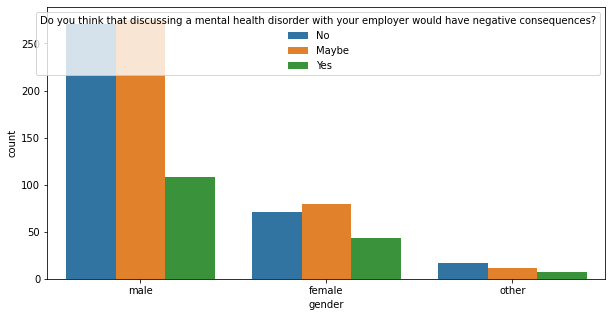

In [24]:
# Women in tech are less inclined to discuss a mental health disorder with their employer than men
plt.figure(figsize=(10,5))
sns.countplot(x='gender',data=tech,hue='Do you think that discussing a mental health disorder with your employer would have negative consequences?')

######  Work from home vs work in-office mental health

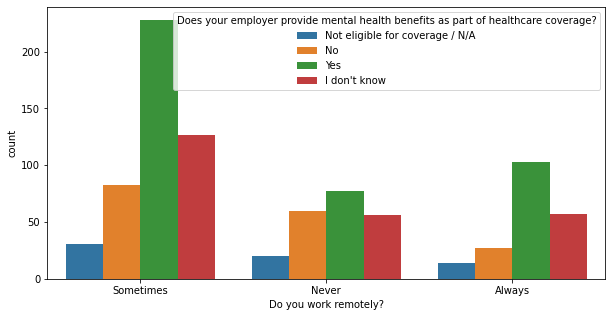

In [25]:
# WFH employees more likely to have mental health benefits
plt.figure(figsize=(10,5))
sns.countplot(x='Do you work remotely?',data=tech,hue='Does your employer provide mental health benefits as part of healthcare coverage?')

In [26]:
# 13% WFH employees do not have mental health benefits 
tech[tech['Do you work remotely?']=='Always']['Does your employer provide mental health benefits as part of healthcare coverage?'].value_counts(normalize=True)

Yes                                0.512438
I don't know                       0.283582
No                                 0.134328
Not eligible for coverage / N/A    0.069652
Name: Does your employer provide mental health benefits as part of healthcare coverage?, dtype: float64

In [27]:
# 28% WIO employees do not have mental health benefits 
tech[tech['Do you work remotely?']=='Never']['Does your employer provide mental health benefits as part of healthcare coverage?'].value_counts(normalize=True)

Yes                                0.361502
No                                 0.281690
I don't know                       0.262911
Not eligible for coverage / N/A    0.093897
Name: Does your employer provide mental health benefits as part of healthcare coverage?, dtype: float64

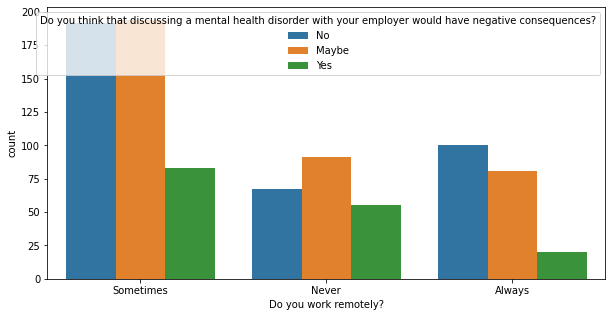

In [28]:
# WFH employees less likely to think that discussing mental health issues will lead to negative consequences
plt.figure(figsize=(10,5))
sns.countplot(x='Do you work remotely?',data=tech,hue='Do you think that discussing a mental health disorder with your employer would have negative consequences?')

##### Generational (in)differences in perceptions about mental health openness

In [29]:
experienced = tech[tech['What is your age?'] > tech['What is your age?'].median()]
novice = tech[tech['What is your age?'] < tech['What is your age?'].median()]

In [30]:
# 61% older employees in tech think discussing mental health may have negative consequences
experienced['Do you think that discussing a mental health disorder with your employer would have negative consequences?'].value_counts(normalize=True)

Maybe    0.431472
No       0.385787
Yes      0.182741
Name: Do you think that discussing a mental health disorder with your employer would have negative consequences?, dtype: float64

In [31]:
# 61% younger employees in tech think discussing mental health may have negative consequences 
novice['Do you think that discussing a mental health disorder with your employer would have negative consequences?'].value_counts(normalize=True)

No       0.430524
Maybe    0.394077
Yes      0.175399
Name: Do you think that discussing a mental health disorder with your employer would have negative consequences?, dtype: float64

In [32]:
# Age does not make a statistically significant difference in perceptions 
experienced['Do you think that discussing a mental health disorder with your employer would have negative consequences?'].value_counts(normalize=True) - novice['Do you think that discussing a mental health disorder with your employer would have negative consequences?'].value_counts(normalize=True)

Maybe    0.037395
No      -0.044737
Yes      0.007342
Name: Do you think that discussing a mental health disorder with your employer would have negative consequences?, dtype: float64

##### Developers vs non developers

In [33]:
# Split employees into developers and not
def dev(role): 
    if ('Developer' in role):
        return 'Developer'
    else:
        return 'Not Developer'

# Create a column called coder to bissect into developers and non-developers
tech['coder'] = tech['Which of the following best describes your work position?'].apply(dev)
tech.head()

<ipython-input-33-aee0cabafdbe>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?,gender,coder
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes,male,Developer
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never,male,Developer
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always,male,Developer
5,0,More than 1000,1.0,NaN,Yes,I am not sure,No,Yes,Yes,Somewhat easy,...,42,Male,United Kingdom,NaN,United Kingdom,NaN,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes,male,Developer
6,0,26-100,1.0,NaN,I don't know,No,No,No,I don't know,Somewhat easy,...,30,M,United States of America,Tennessee,United States of America,Tennessee,Back-end Developer,Sometimes,male,Developer


In [34]:
# 48% of non-developers have a mental health disorder
tech[tech['coder']== 'Not Developer']['Do you currently have a mental health disorder?'].value_counts(normalize=True)

Yes      0.479310
No       0.351724
Maybe    0.168966
Name: Do you currently have a mental health disorder?, dtype: float64

In [35]:
# 35% of developers have a mental health disorder
tech[tech['coder']== 'Developer']['Do you currently have a mental health disorder?'].value_counts(normalize=True)

No       0.401349
Yes      0.352445
Maybe    0.246206
Name: Do you currently have a mental health disorder?, dtype: float64

In [36]:
# 62% of non-developers have sought treatment from a mental health professional
tech[tech['coder']== 'Not Developer']['Have you ever sought treatment for a mental health issue from a mental health professional?'].value_counts(normalize=True)

1    0.62069
0    0.37931
Name: Have you ever sought treatment for a mental health issue from a mental health professional?, dtype: float64

In [37]:
# 55% of developers have sought treatment from a mental health professional
tech[tech['coder']== 'Developer']['Have you ever sought treatment for a mental health issue from a mental health professional?'].value_counts(normalize=True)

1    0.549747
0    0.450253
Name: Have you ever sought treatment for a mental health issue from a mental health professional?, dtype: float64

##### Effective vs Ineffective mental health treatment consequences on employee performance

In [38]:
tech['If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?'].value_counts(normalize=True)

Not applicable to me    0.390713
Sometimes               0.260476
Rarely                  0.221971
Never                   0.087203
Often                   0.039638
Name: If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?, dtype: float64

In [39]:
tech['If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?'].value_counts(normalize=True)

Often                   0.373726
Not applicable to me    0.334088
Sometimes               0.243488
Rarely                  0.038505
Never                   0.010193
Name: If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?, dtype: float64

In [40]:
# 33% more likely of mental health issue interfering with work often without effective treatment
tech['If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?'].value_counts(normalize=True) - tech['If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?'].value_counts(normalize=True) 

Never                  -0.077010
Not applicable to me   -0.056625
Often                   0.334088
Rarely                 -0.183465
Sometimes              -0.016988
dtype: float64

### 2. Comparing mental health at big tech companies to startups

In [41]:
# get the sizes of various tech companies
tech['How many employees does your company or organization have?'].unique()

array(['26-100', '6-25', 'More than 1000', '100-500', '500-1000', '1-5'],
      dtype=object)

In [42]:
# Split df into tech startups and large tech companies based on employee number
startups = tech[(tech['How many employees does your company or organization have?'] == '1-5') | (tech['How many employees does your company or organization have?'] == '6-25')]
bigTech = tech[(tech['How many employees does your company or organization have?'] == '500-1000') | (tech['How many employees does your company or organization have?'] == 'More than 1000')]

In [43]:
len(startups) # 234 tech startups

234

In [44]:
len(bigTech) # 196 big tech companies

196

#### Mental Health Awareness

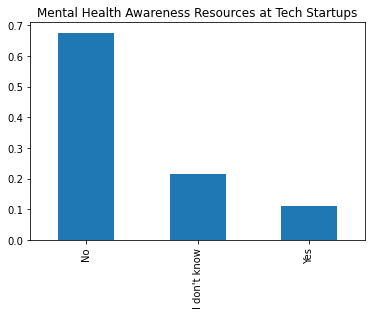

In [45]:
# 68% tech startups do not offer resources to learn about mental health  
startups['Does your employer offer resources to learn more about mental health concerns and options for seeking help?'].value_counts(normalize=True).plot.bar(title='Mental Health Awareness Resources at Tech Startups')

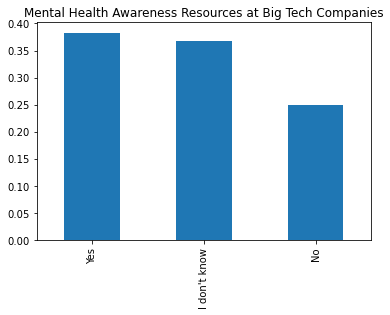

In [46]:
# 24% big tech companies do not offer resources to learn about mental health  
bigTech['Does your employer offer resources to learn more about mental health concerns and options for seeking help?'].value_counts(normalize=True).plot.bar(title='Mental Health Awareness Resources at Big Tech Companies')

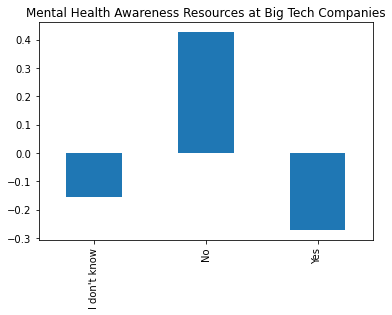

In [47]:
# Difference: Big tech companies much more likely to have resources to learn more about mental health
diff = startups['Does your employer offer resources to learn more about mental health concerns and options for seeking help?'].value_counts(normalize=True) - bigTech['Does your employer offer resources to learn more about mental health concerns and options for seeking help?'].value_counts(normalize=True)
diff.plot.bar(title='Mental Health Awareness Resources at Big Tech Companies')

##### Openness to discussing mental health challenges with coworkers

In [48]:
# 29% startup employees comfortable to talk about mental health with coworkers
startups['Would you feel comfortable discussing a mental health disorder with your coworkers?'].value_counts(normalize=True)

Maybe    0.384615
No       0.329060
Yes      0.286325
Name: Would you feel comfortable discussing a mental health disorder with your coworkers?, dtype: float64

In [49]:
# 25% big tech employees comfortable to talk about mental health with coworkers
bigTech['Would you feel comfortable discussing a mental health disorder with your coworkers?'].value_counts(normalize=True)

Maybe    0.397959
No       0.352041
Yes      0.250000
Name: Would you feel comfortable discussing a mental health disorder with your coworkers?, dtype: float64

#### Openness to discussing mental health challenges with superviser

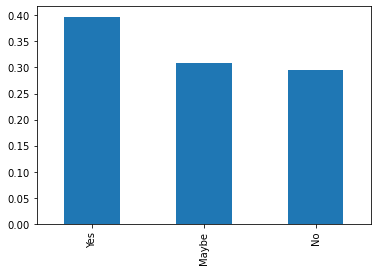

In [50]:
# 40% employees at startups comfortable to talk about mental health with superviser
startups['Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?'].value_counts(normalize=True).plot.bar()

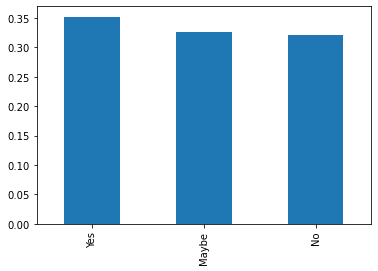

In [51]:
# 35% big tech company employees comfortable to talk about mental health with superviser
bigTech['Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?'].value_counts(normalize=True).plot.bar()

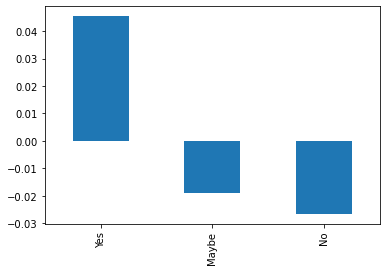

In [52]:
# Difference: Employees at startups more willing to talk to superviser than big tech employees
diff = startups['Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?'].value_counts(normalize=True) - bigTech['Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?'].value_counts(normalize=True)
diff.plot.bar()

#### Mental Health Services

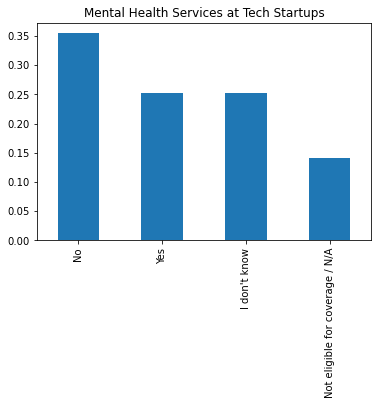

In [53]:
# 25% startups provide mental health services 
startups['Does your employer provide mental health benefits as part of healthcare coverage?'].value_counts(normalize=True).plot.bar(title='Mental Health Services at Tech Startups')

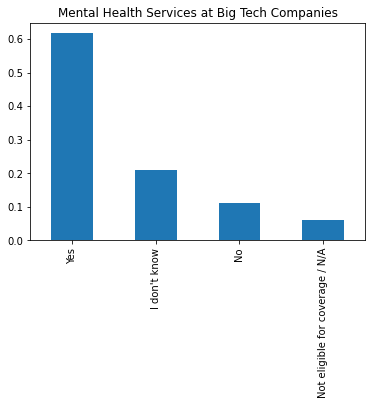

In [54]:
# 60% mental Health Services at Big Tech Companies
bigTech['Does your employer provide mental health benefits as part of healthcare coverage?'].value_counts(normalize=True).plot.bar(title='Mental Health Services at Big Tech Companies')

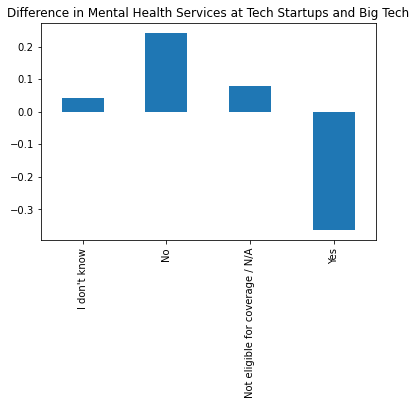

In [55]:
# Difference: Big tech companies more likely to have mental health services for employees
diff = startups['Does your employer provide mental health benefits as part of healthcare coverage?'].value_counts(normalize=True) - bigTech['Does your employer provide mental health benefits as part of healthcare coverage?'].value_counts(normalize=True)
diff.plot.bar(title='Difference in Mental Health Services at Tech Startups and Big Tech')